# E-Commerce Data set Project - Data Analyst Submission
<br>
By : Wendi Kardian <br>  
email : wendikardian@gmail.com <br>
Id Dicoding = wendie13

## <b>Define business question</b>
<br>
1. Which month experiences the highest volume of transactional activity on the e-commerce platform?<br>
2. What are the best-selling products and least-selling products?<br>
3. How much budget do customers spend in recent months? <br>
4. Where are the majority of customers located geographically? <br>
5. What is the level of customer satisfaction with our services? <br>
6. Which payment method do customers prefer

# Data Wrangling

## Import the libraries needed for this project.
We use `numpy` for numerical computations and array manipulations, `pandas` for data manipulation and analysis with its DataFrame and Series data structures, and `matplotlib.pyplot` for creating various types of plots and visualizations to explore data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Gathering Data
<br>
Download the data from the source google drive and then extract the zip file

In [2]:

from google.colab import drive
drive.mount('/content/drive')
!pip install gdown

import gdown
import zipfile
import os

file_id = '1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK'
dest_dir = '/content/drive/My Drive/data'

dest_file_path = os.path.join(dest_dir, 'E-commerce-public-dataset.zip')

gdown.download('https://drive.google.com/uc?id=' + file_id, dest_file_path, quiet=False)

with zipfile.ZipFile(dest_file_path, 'r') as zip_ref:
    zip_ref.extractall(dest_dir)

print("Extraction complete.")


Mounted at /content/drive


Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=df562cdb-4f18-441b-8171-4699d6651efb
To: /content/drive/My Drive/data/E-commerce-public-dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 129MB/s]


Extraction complete.


In [3]:
base_data_dir = '/content/drive/My Drive/data/E-Commerce Public Dataset/'
orders = pd.read_csv(base_data_dir + 'orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
items = pd.read_csv(base_data_dir + 'order_items_dataset.csv')
products = pd.read_csv(base_data_dir + 'products_dataset.csv')
payments = pd.read_csv(base_data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(base_data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(base_data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(base_data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(base_data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(base_data_dir + 'product_category_name_translation.csv')


### Items dataset

In [5]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


### Products dataset

In [6]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### Payments Dataset

In [7]:
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Reviews Dataset

In [8]:
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


### Customers Dataset

In [9]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Seller Dataset

In [10]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Geolocation Dataset

In [11]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Category Dataset

In [12]:
category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Asessing Data
Data assessment involves examining the quality, completeness, and integrity of the dataset to identify any inconsistencies or anomalies. The goal is to ensure that the data is reliable and suitable for analysis, enabling informed decision-making and accurate insights.

### Check the missing values

In [13]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

The check shows that most columns have no missing data except for 'order_approved_at', 'order_delivered_carrier_date', and 'order_delivered_customer_date', which have 160, 1783, and 2965 missing values respectively. These missing values should be addressed before further analysis.

In [14]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

there is no missing value there

In [15]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

There are missing values in several product-related columns, with 610 missing values in most attributes and only 2 missing values each in 'product_weight_g', 'product_length_cm', 'product_height_cm', and 'product_width_cm'. Addressing these missing values is essential to maintain data integrity and completeness for analysis.

In [16]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

there is no missing value in payments dataframe

In [17]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

The 'reviews' dataframe has no missing values in the 'review_id', 'order_id', 'review_score', 'review_creation_date', and 'review_answer_timestamp' columns. However, 'review_comment_title' has 87656 missing values and 'review_comment_message' has 58247 missing values, suggesting many reviews lack titles or messages.

In [18]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

there is no missing value in customers data frame

In [19]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

there is no missing value in sellers data frame

In [20]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

there is no missing value in geolocation data frame

In [21]:
category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

there is no missing value in category data frame

In [22]:
print("orders dataframe")
orders.info()
print("items dataframe")
items.info()
print("products items")
products.info()
print("payments items")
payments.info()
print("reviews items")
reviews.info()
print("customers items")
customers.info()
print("sellers items")
sellers.info()
print("geolocations items")
geolocation.info()
print("category items")
category.info()

orders dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
items dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id    


Upon examining the .info() output for each dataset, it seems that the date columns (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, shipping_limit_date, review_creation_date, review_answer_timestamp) are all currently stored as object data types.

Next, need to converted into a datetime data type

In [23]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])


In [24]:
orders.info()
items.info()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype     

### Check data duplication

In [25]:
orders_duplicates_count = orders.duplicated().sum()
items_duplicates_count = items.duplicated().sum()
products_duplicates_count = products.duplicated().sum()
payments_duplicates_count = payments.duplicated().sum()
reviews_duplicates_count = reviews.duplicated().sum()
customers_duplicates_count = customers.duplicated().sum()
sellers_duplicates_count = sellers.duplicated().sum()
geolocation_duplicates_count = geolocation.duplicated().sum()
category_duplicates_count = category.duplicated().sum()

print("Count of duplicate rows in orders dataset:", orders_duplicates_count)
print("Count of duplicate rows in items dataset:", items_duplicates_count)
print("Count of duplicate rows in products dataset:", products_duplicates_count)
print("Count of duplicate rows in payments dataset:", payments_duplicates_count)
print("Count of duplicate rows in reviews dataset:", reviews_duplicates_count)
print("Count of duplicate rows in customers dataset:", customers_duplicates_count)
print("Count of duplicate rows in sellers dataset:", sellers_duplicates_count)
print("Count of duplicate rows in geolocation dataset:", geolocation_duplicates_count)
print("Count of duplicate rows in category dataset:", category_duplicates_count)


Count of duplicate rows in orders dataset: 0
Count of duplicate rows in items dataset: 0
Count of duplicate rows in products dataset: 0
Count of duplicate rows in payments dataset: 0
Count of duplicate rows in reviews dataset: 0
Count of duplicate rows in customers dataset: 0
Count of duplicate rows in sellers dataset: 0
Count of duplicate rows in geolocation dataset: 261831
Count of duplicate rows in category dataset: 0


In the geolocation dataset, there are 261,831 rows with the same values across all columns. These duplicate rows may suggest repetition or errors in the data and should be reviewed for potential removal or correction to ensure data accuracy.

In [26]:
orders_stats = orders.describe()
items_stats = items.describe()
products_stats = products.describe()
payments_stats = payments.describe()
reviews_stats = reviews.describe()
customers_stats = customers.describe()
sellers_stats = sellers.describe()
geolocation_stats = geolocation.describe()
category_stats = category.describe()

print("Statistics for orders dataframe:\n", orders_stats)
print("\nStatistics for items dataframe:\n", items_stats)
print("\nStatistics for products dataframe:\n", products_stats)
print("\nStatistics for payments dataframe:\n", payments_stats)
print("\nStatistics for reviews dataframe:\n", reviews_stats)
print("\nStatistics for customers dataframe:\n", customers_stats)
print("\nStatistics for sellers dataframe:\n", sellers_stats)
print("\nStatistics for geolocation dataframe:\n", geolocation_stats)
print("\nStatistics for category dataframe:\n", category_stats)


Statistics for orders dataframe:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   
first           NaN      2016-09-04 21:15:19  2016-09-15 12:16:38   
last 

<ipython-input-26-7a7d9adf47ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_stats = orders.describe()
<ipython-input-26-7a7d9adf47ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_stats = orders.describe()
<ipython-input-26-7a7d9adf47ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_stats = orders.describe()
<ipython-input-26-7a7d9adf47ec>:1: FutureWarning:

## Data Cleaning
Data cleaning is the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to ensure its accuracy and reliability for analysis.

Remove the missing value from orders dataframe (with datetime data types) using .fillna()

In [27]:
print('Order who missing delivery dates : ' + str(orders.order_delivered_customer_date.isnull().sum()))

Order who missing delivery dates : 2965


Missing data in the specified columns ('order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date') are filled by replacing them with the median value of each respective column. This method helps maintain data integrity and preserves the overall distribution characteristics of the dataset while mitigating the impact of missing values.

In [28]:
orders['order_approved_at'].fillna(orders['order_approved_at'].median(), inplace=True)
orders['order_delivered_carrier_date'].fillna(orders['order_delivered_carrier_date'].median(), inplace=True)
orders['order_delivered_customer_date'].fillna(orders['order_delivered_customer_date'].median(), inplace=True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [30]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

based on the information above, every missing value from this dataframe already filled

In [31]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

#### Analyze Delivery Performance:

In [32]:
delivered_orders = orders[orders['order_status'] == 'delivered']
average_delivery_time = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_purchase_timestamp']).mean()
print("Average delivery time:", average_delivery_time)


Average delivery time: 12 days 13:14:19.786998072


In [33]:
# Merge similar categories
orders['order_status'] = orders['order_status'].replace({'shipped': 'in_transit', 'processing': 'in_transit'})

# Verify the changes
print(orders['order_status'].value_counts())


delivered      96478
in_transit      1408
canceled         625
unavailable      609
invoiced         314
created            5
approved           2
Name: order_status, dtype: int64


In [34]:
orders.describe()

<ipython-input-34-ce468bcbb7ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
<ipython-input-34-ce468bcbb7ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
<ipython-input-34-ce468bcbb7ec>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe()
<ipython-input-34-ce468bcbb7ec>:1: FutureWarning: Treating datetime data as categorical rather

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,7,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2017-12-20 00:00:00
freq,1,1,96478,3,161,1783,2965,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [35]:
print('Order who missing delivery dates : ' + str(orders.order_delivered_customer_date.isnull().sum()))

Order who missing delivery dates : 0


### Handle Missing value from Products Dataframe

In [36]:
import pandas as pd

products['product_weight_g'].fillna(products['product_weight_g'].mean(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].mean(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].mean(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].mean(), inplace=True)

products['product_category_name'].fillna(products['product_category_name'].mode()[0], inplace=True)

products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)


utilizes the pandas library in Python to fill missing values in various columns of a dataframe named 'products'. It employs the fillna() method to replace NaN (missing) values with either the mean (for numerical columns) or the mode (for categorical columns) of each respective column, and fills certain columns representing lengths and quantities with zeros assuming missing values indicate absence of data.

In [37]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.472488,30.815078,16.937661,23.196728
std,12.071951,637.745057,1.745732,4281.908773,16.913945,13.637140,12.078681
min,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [38]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Handle Missing value from Reviews Dataframe

In [39]:
import pandas as pd
# Fill missing values in 'review_comment_title' and 'review_comment_message' columns with an empty string
reviews['review_comment_title'].fillna('', inplace=True)
reviews['review_comment_message'].fillna('', inplace=True)


In [40]:
reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [41]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Removing Duplicates Rows in geolocation dataframe

In [42]:
print("Shape of DataFrame before removing duplicates:", geolocation.shape)
geolocation.drop_duplicates(inplace=True)
print("Shape of DataFrame after removing duplicates:", geolocation.shape)
geolocation.to_csv('cleaned_geolocation_dataset.csv', index=False)

Shape of DataFrame before removing duplicates: (1000163, 5)
Shape of DataFrame after removing duplicates: (738332, 5)


## Exploratory Data Analysis (EDA)

### Orders dataframe

group the data by the 'order_status' column and then apply aggregation functions such as count() to see the frequency of each order status.

In [43]:
order_status_counts = orders.groupby('order_status').agg(count=('order_id', 'count'))
order_status_counts


,count
order_status,
approved,2
canceled,625
created,5
delivered,96478
in_transit,1408
invoiced,314
unavailable,609


calculate the time differences between order-related timestamps like 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', and 'order_delivered_customer_date' to understand the order processing and delivery times.

In [44]:
orders['purchase_to_approval_time'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['approval_to_carrier_time'] = orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders['carrier_to_delivery_time'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approval_time,approval_to_carrier_time,carrier_to_delivery_time
38628,be1b2440de60927d6a4432b36cc31c71,41181c4f1f3c814dfcfea3957eec452c,delivered,2017-09-07 18:36:26,2017-09-07 19:20:05,2017-09-11 21:24:51,2017-09-16 02:53:31.000,2017-09-28,0 days 00:43:39,4 days 02:04:46,4 days 05:28:40
93849,a610b42e6e4319084d3ce5f60e0dc1ff,38fe17916fc80f1ef8722075cafc9070,delivered,2018-08-05 19:15:52,2018-08-05 19:30:14,2018-08-06 13:09:00,2018-08-07 17:05:49.000,2018-08-09,0 days 00:14:22,0 days 17:38:46,1 days 03:56:49
16584,ead42f8f41e34c480a4a9185ab74b37e,2648ef8cd82f3bb5f79d18def3549549,delivered,2017-10-14 00:48:58,2017-10-14 01:12:48,2017-10-19 18:55:33,2017-10-20 19:52:18.000,2017-10-30,0 days 00:23:50,5 days 17:42:45,1 days 00:56:45
70198,c80cc9af6bd1c32747e2f79bc4ad031e,f9587fa6065768be96b7267f865a407c,canceled,2018-06-23 17:34:33,2018-06-23 17:55:45,2018-01-24 16:10:58,2018-02-02 19:28:10.500,2018-07-05,0 days 00:21:12,-151 days +22:15:13,9 days 03:17:12.500000
3014,0899b756a6357ed330e0620ad548d70d,2d90e2af0254c36c6a60ca45c25ecbc3,delivered,2017-08-30 01:51:30,2017-08-30 02:05:08,2017-08-30 17:42:33,2017-09-04 14:32:29.000,2017-09-12,0 days 00:13:38,0 days 15:37:25,4 days 20:49:56


In [45]:
time_diff_stats = orders.agg({
    'purchase_to_approval_time': ['mean', 'median', 'min', 'max'],
    'approval_to_carrier_time': ['mean', 'median', 'min', 'max'],
    'carrier_to_delivery_time': ['mean', 'median', 'min', 'max']
})
time_diff_stats

,purchase_to_approval_time,approval_to_carrier_time,carrier_to_delivery_time
mean,0 days 10:35:32.179252018,4 days 11:01:22.095805553,9 days 19:38:04.154659546
median,0 days 00:20:36,1 days 20:09:55,7 days 03:47:03
min,-272 days +18:05:55,-359 days +03:20:37,-214 days +04:03:10.500000
max,471 days 15:54:41,477 days 05:44:18,479 days 03:15:47.500000


### Items dataframe

In [46]:
order_item_distribution = items['order_item_id'].value_counts()
order_item_distribution

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [47]:
product_stats = items.groupby('product_id').agg({
    'price': ['mean', 'median', 'min', 'max'],
    'freight_value': ['mean', 'median', 'min', 'max']
})
product_stats


price                          \
                                    mean  median     min     max   
product_id                                                         
00066f42aeeb9f3007548bb9d3f33c38  101.65  101.65  101.65  101.65   
00088930e925c41fd95ebfe695fd2655  129.90  129.90  129.90  129.90   
0009406fd7479715e4bef61dd91f2462  229.00  229.00  229.00  229.00   
000b8f95fcb9e0096488278317764d19   58.90   58.90   58.90   58.90   
000d9be29b5207b54e86aa1b1ac54872  199.00  199.00  199.00  199.00   
...                                  ...     ...     ...     ...   
fff6177642830a9a94a0f2cba5e476d1  114.99  114.99  109.99  119.99   
fff81cc3158d2725c0655ab9ba0f712c   90.00   90.00   90.00   90.00   
fff9553ac224cec9d15d49f5a263411f   32.00   32.00   32.00   32.00   
fffdb2d0ec8d6a61f0a0a0db3f25b441   33.99   34.99   29.99   34.99   
fffe9eeff12fcbd74a2f2b007dde0c58  249.99  249.99  249.99  249.99   

                                 freight_value                        
                                          mean  median    min    max  
product_id                                                            
00066f42aeeb9f3007548bb9d3f33c38        18.590  18.590  18.59  18.59  
00088930e925c41fd95ebfe695fd2655        13.930  13.930  13.93  13.93  
0009406fd7479715e4bef61dd91f2462        13.100  13.100  13.10  13.10  
000b8f95fcb9e0096488278317764d19        19.600  19.600  19.60  19.60  
000d9be29b5207b54e86aa1b1ac54872        19.270  19.270  19.27  19.27  
...                                        ...     ...    ...    ...  
fff6177642830a9a94a0f2cba5e476d1        27.705  27.705  17.02  38.39  
fff81cc3158d2725c0655ab9ba0f712c         7.890   7.890   7.89   7.89  
fff9553ac224cec9d15d49f5a263411f        11.850  11.850  11.85  11.85  
fffdb2d0ec8d6a61f0a0a0db3f25b441        11.774   7.510   7.39  18.23  
fffe9eeff12fcbd74a2f2b007dde0c58        53.880  53.880  53.88  53.88  

[32951 rows x 8 columns]

In [48]:
items['shipping_month'] = items['shipping_limit_date'].dt.month
month_counts = items['shipping_month'].value_counts().sort_index()
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
month_counts.index = month_counts.index.map(month_names)
month_counts


January       8173
February      9243
March        11510
April        10003
May          12915
June         10698
July         10788
August       13857
September     4827
October       5554
November      7355
December      7727
Name: shipping_month, dtype: int64

The data indicates varying shipment volumes throughout the year, with peaks observed in March, May, August, and December, while September and October show comparatively lower shipment counts. Understanding these seasonal trends can aid in resource allocation and strategic planning for managing inventory and logistics.

### Producs dataframe

Group the data by 'product_category_name' and calculate aggregate statistics such as mean, median, minimum, and maximum for numerical columns

In [49]:
product_category_stats = products.groupby('product_category_name').agg({
    'product_photos_qty': ['mean', 'median', 'min', 'max'],
    'product_weight_g': ['mean', 'median', 'min', 'max'],
    'product_length_cm': ['mean', 'median', 'min', 'max'],
    'product_height_cm': ['mean', 'median', 'min', 'max'],
    'product_width_cm': ['mean', 'median', 'min', 'max']
})
product_category_stats


product_photos_qty                    \
                                        mean median  min   max   
product_category_name                                            
agro_industria_e_comercio           2.310811    1.0  1.0   8.0   
alimentos                           1.939024    1.0  1.0   7.0   
alimentos_bebidas                   1.894231    1.0  1.0  10.0   
artes                               2.163636    1.0  1.0  10.0   
artes_e_artesanato                  3.000000    3.0  1.0   7.0   
...                                      ...    ...  ...   ...   
sinalizacao_e_seguranca             2.483871    2.0  1.0   9.0   
tablets_impressao_imagem            3.000000    3.0  1.0   7.0   
telefonia                           2.759259    2.0  1.0  13.0   
telefonia_fixa                      2.991379    3.0  1.0  11.0   
utilidades_domesticas               2.212848    1.0  1.0  13.0   

                          product_weight_g                          \
                                      mean  median    min      max   
product_category_name                                                
agro_industria_e_comercio      5263.405405  2681.5   50.0  30000.0   
alimentos                       923.414634   541.5   75.0   8238.0   
alimentos_bebidas              1307.932692   600.0   50.0  10800.0   
artes                          1691.763636   700.0  100.0  15400.0   
artes_e_artesanato             1164.578947   500.0  100.0   6850.0   
...                                    ...     ...    ...      ...   
sinalizacao_e_seguranca        2969.817204   575.0  100.0  27100.0   
tablets_impressao_imagem        381.444444   300.0  100.0   1100.0   
telefonia                       236.506173   200.0   50.0   8100.0   
telefonia_fixa                  660.827586   414.5   50.0   6050.0   
utilidades_domesticas          3020.793576  1050.0   50.0  30000.0   

                          product_length_cm                      \
                                       mean median   min    max   
product_category_name                                             
agro_industria_e_comercio         36.527027   31.5  11.0   99.0   
alimentos                         21.292683   19.5  16.0   44.0   
alimentos_bebidas                 23.403846   21.0  16.0   57.0   
artes                             35.927273   30.0  16.0  100.0   
artes_e_artesanato                28.368421   21.0  16.0  105.0   
...                                     ...    ...   ...    ...   
sinalizacao_e_seguranca           30.505376   25.0  16.0  100.0   
tablets_impressao_imagem          28.111111   26.0  16.0   60.0   
telefonia                         18.432981   18.0  12.0   40.0   
telefonia_fixa                    20.646552   19.0  14.0  100.0   
utilidades_domesticas             31.859957   30.0  10.0  105.0   

                          product_height_cm                     \
                                       mean median  min    max   
product_category_name                                            
agro_industria_e_comercio         28.945946   25.5  2.0  105.0   
alimentos                         14.682927   14.0  4.0   52.0   
alimentos_bebidas                 15.951923   15.0  2.0   40.0   
artes                             11.800000   10.0  2.0   62.0   
artes_e_artesanato                 9.789474    9.0  2.0   25.0   
...                                     ...    ...  ...    ...   
sinalizacao_e_seguranca           23.892473   15.0  2.0  105.0   
tablets_impressao_imagem           9.444444    6.0  3.0   27.0   
telefonia                          6.853616    5.0  2.0   51.0   
telefonia_fixa                    10.741379    9.0  2.0   30.0   
utilidades_domesticas             22.337901   20.0  2.0  105.0   

                          product_width_cm                     
                                      mean median   min   max  
product_category_name                                          
agro_industria_e_comercio        25.810811   24.0  10.0  80.0  


Use value_counts() to find the frequency of each product category and identify the most common product categories.

In [50]:
product_category_counts = products['product_category_name'].value_counts()
product_category_counts


cama_mesa_banho                  3639
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

### Payments dataframe

In [51]:
payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
45098,275ae89ba1c842d7ce099ed4c633f686,1,credit_card,8,310.65
11056,aae4a80d679f211688ed391ae747100f,1,credit_card,2,144.64
101188,9ba0165adc8f80295e82cb5418788889,1,credit_card,1,41.55
34873,4258b5bedf2331953c0b974849dd7b24,1,boleto,1,98.82
36907,3e1a73eb054c586cb259149ffdfd13ba,1,credit_card,1,93.56


In [52]:
payment_type_stats = payments.groupby('payment_type').agg({
    'payment_installments': ['count', 'mean', 'median', 'min', 'max'],
    'payment_value': ['mean', 'median', 'min', 'max']
})
payment_type_stats


payment_installments                          payment_value  \
                            count      mean median min max          mean   
payment_type                                                               
boleto                      19784  1.000000    1.0   1   1    145.034435   
credit_card                 76795  3.507155    3.0   0  24    163.319021   
debit_card                   1529  1.000000    1.0   1   1    142.570170   
not_defined                     3  1.000000    1.0   1   1      0.000000   
voucher                      5775  1.000000    1.0   1   1     65.703354   

                                       
              median    min       max  
payment_type                           
boleto         93.89  11.62   7274.88  
credit_card   106.87   0.01  13664.08  
debit_card     89.30  13.38   4445.50  
not_defined     0.00   0.00      0.00  
voucher        39.28   0.00   3184.34

The table provides a breakdown of payment methods, revealing that credit card payments are the most common and tend to have the highest average and median payment values, while voucher payments have the lowest average and median values, with most payments across all methods made with a single installment.

### Review dataframe

In [53]:
reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
17205,6387c7e64f80a2ab5855acc39c8a6d1e,884cb4ce4a06390d35206de06f785d13,4,,,2018-04-06,2018-04-09 02:16:15
10481,2ad92e856730f215830796da7bbf95a1,23b9e7764953e9889b44983acf062485,5,,,2017-12-13,2017-12-15 10:53:40
2266,0c4619cf51f22f9b8d1510e54baa4c19,d57d9345daadd30b1ce4c22c40250583,5,,Produto excelente. Recomendo.,2017-09-30,2017-10-03 00:02:00
85414,db8d57be56f47bdaa9a09f1d79e4bd8f,aa0cb1c340fa8ff2e4a09780d829e118,1,,Produto Falsificado sem selo,2017-09-27,2017-10-01 20:45:05
25715,49b3a0f3ee5cab9c2a57b37c2e0c67b3,a5feb0197f260c5208284d3d53639266,1,,"Desorganização, produto veio errado.",2017-03-09,2017-03-10 12:51:25


In [54]:
review_score_stats = reviews.groupby('review_score').agg({
    'review_creation_date': ['count', 'min', 'max'],
    'review_answer_timestamp': ['min', 'max']
})

review_score_stats



review_creation_date                                 \
                            count                 min        max   
review_score                                                       
1                           11424 2016-10-02 00:00:00 2018-08-31   
2                            3151 2016-10-22 00:00:00 2018-08-31   
3                            8179 2016-10-19 00:00:00 2018-08-31   
4                           19142 2016-10-15 00:00:00 2018-08-31   
5                           57328 2016-10-16 01:00:00 2018-08-31   

             review_answer_timestamp                      
                                 min                 max  
review_score                                              
1                2016-10-07 18:32:28 2018-10-22 03:33:14  
2                2016-10-22 09:25:13 2018-10-16 17:06:29  
3                2016-10-22 09:57:02 2018-10-17 15:10:18  
4                2016-10-16 03:20:17 2018-10-21 23:03:07  
5                2016-10-16 15:45:11 2018-10-29 12:27:35

alculate aggregate statistics such as count, mean, median, minimum, and maximum for numerical columns like 'review_creation_date' and 'review_answer_timestamp'.

In [55]:
reviews['review_creation_month'] = reviews['review_creation_date'].dt.month
# Group by month and calculate the count of reviews
monthly_review_counts = reviews.groupby('review_creation_month').size()
monthly_review_counts


review_creation_month
1      6418
2      7514
3     10284
4      9342
5     11168
6     10155
7      9137
8     13490
9      4199
10     4603
11     4887
12     8027
dtype: int64

### Customers Dataframe

In [56]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
39550,3ed02ecec86b66da53e5b117fc5685c5,95a8f0b8b0a52854c66128c2f8a8dc66,48860,queimadas,BA
98926,3b396314ce0b8974b7061c0d11212416,a5d5022b1084315b8de8125050a37eb2,37600,cambui,MG
93359,90f51bec5d0d69face28f9243b919d34,4cde5935a14d2026e0ddc96766048e21,26600,paracambi,RJ
89894,9ce10032cfbf7d2dd3cfe41c48625e59,2f87954d18290f96cba6736b8ff5f6fa,89245,araquari,SC
36662,52f838b3b224273fda779d20cdc0f259,9229fd31a6082b07a556ef16d1465498,88516,lages,SC


In [57]:
state_stats = customers.groupby('customer_state').agg({
    'customer_id': ['count', 'nunique'],
    'customer_unique_id': 'nunique'
})
state_stats

customer_id         customer_unique_id
                     count nunique            nunique
customer_state                                       
AC                      81      81                 77
AL                     413     413                401
AM                     148     148                143
AP                      68      68                 67
BA                    3380    3380               3277
CE                    1336    1336               1313
DF                    2140    2140               2075
ES                    2033    2033               1964
GO                    2020    2020               1952
MA                     747     747                726
MG                   11635   11635              11259
MS                     715     715                694
MT                     907     907                876
PA                     975     975                949
PB                     536     536                519
PE                    1652    1652               1609
PI                     495     495                482
PR                    5045    5045               4882
RJ                   12852   12852              12384
RN                     485     485                474
RO                     253     253                240
RR                      46      46                 45
RS                    5466    5466               5277
SC                    3637    3637               3534
SE                     350     350                342
SP                   41746   41746              40302
TO                     280     280                273

Group the data by 'customer_state' and calculate aggregate statistics such as count, unique customer counts, and unique customer IDs.

In [58]:
zip_prefix_stats = customers.groupby('customer_zip_code_prefix').agg({
    'customer_id': ['count', 'nunique'],
    'customer_unique_id': 'nunique'
})
zip_prefix_stats

customer_id         customer_unique_id
                               count nunique            nunique
customer_zip_code_prefix                                       
1003                               1       1                  1
1004                               2       2                  2
1005                               6       6                  5
1006                               2       2                  2
1007                               4       4                  4
...                              ...     ...                ...
99960                              2       2                  2
99965                              2       2                  2
99970                              1       1                  1
99980                              2       2                  2
99990                              1       1                  1

[14994 rows x 3 columns]

Group the data by 'customer_zip_code_prefix' and calculate aggregate statistics such as count and unique customer counts.

### Sellers dataframe

In [59]:
sellers.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
437,c5ebe6598748b0aeaa61cfb820478b92,95910,lajeado,RS
2258,4b5f66b7adcf57f1ecc0d3c07dd6b177,87025,vendas@creditparts.com.br,PR
1366,65febd49fd28ec955651299159b1f527,3275,sao paulo,SP
2984,adbe70ab2c97442046d393988c8d1d27,9321,maua,SP
2958,81f89e42267213cb94da7ddc301651da,19063,presidente prudente,SP


In [60]:
state_stats = sellers.groupby('seller_state').agg({
    'seller_id': ['count', 'nunique']
})
state_stats

seller_id        
                 count nunique
seller_state                  
AC                   1       1
AM                   1       1
BA                  19      19
CE                  13      13
DF                  30      30
ES                  23      23
GO                  40      40
MA                   1       1
MG                 244     244
MS                   5       5
MT                   4       4
PA                   1       1
PB                   6       6
PE                   9       9
PI                   1       1
PR                 349     349
RJ                 171     171
RN                   5       5
RO                   2       2
RS                 129     129
SC                 190     190
SE                   2       2
SP                1849    1849

### Geolocation dataframe

In [61]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
716062,54100,-8.113326,-34.968198,jaboatao dos guararapes,PE
270739,12223,-23.178604,-45.817974,sao jose dos campos,SP
294060,13184,-22.866055,-47.218451,hortolandia,SP
907202,88101,-27.594454,-48.613601,sao jose,SC
76285,4140,-23.599067,-46.629272,sao paulo,SP


In [62]:
state_stats = geolocation.groupby('geolocation_state').agg({
    'geolocation_zip_code_prefix': ['count', 'nunique']
})
state_stats

geolocation_zip_code_prefix        
                                        count nunique
geolocation_state                                    
AC                                       1039      46
AL                                       3415     178
AM                                       1986     144
AP                                        738      26
BA                                      27720     992
CE                                       9541     548
DF                                       9080     516
ES                                      12632     315
GO                                      15601     773
MA                                       6277     313
MG                                     101353    1868
MS                                       8594     242
MT                                       9374     254
PA                                       8551     309
PB                                       4787     324
PE                                      13162     596
PI                                       3592     307
PR                                      45059    1046
RJ                                      78836    1390
RN                                       4014     280
RO                                       2523     108
RR                                        568      28
RS                                      48093    1132
SC                                      30191     620
SE                                       2653     135
SP                                     285976    6349
TO                                       2977     184

In [63]:
zip_prefix_stats = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_city': 'nunique'
})
zip_prefix_stats


,geolocation_city
geolocation_zip_code_prefix,
1001,2
1002,2
1003,2
1004,2
1005,2
...,...
99960,1
99965,1
99970,2


### Category dataframe

In [64]:
category.sample(5)

,product_category_name,product_category_name_english
36,construcao_ferramentas_ferramentas,costruction_tools_tools
20,audio,audio
51,fashion_esporte,fashion_sport
62,casa_conforto_2,home_comfort_2
52,sinalizacao_e_seguranca,signaling_and_security


In [65]:

unique_translated_categories = category['product_category_name_english'].nunique()

print("Number of unique translated categories:", unique_translated_categories)


Number of unique translated categories: 71


### Merge Dataset

In [66]:
merged_data = pd.merge(items, sellers, on='seller_id', how='left')
merged_data = pd.merge(merged_data, products, on='product_id', how='left')

merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   shipping_month              112650 non-null  int64         
 8   seller_zip_code_prefix      112650 non-null  int64         
 9   seller_city                 112650 non-null  object        
 10  seller_state                112650 non-null  object        
 11  product_category_name       112650 non-

The correlation matrix provides a numerical representation of the relationships between different variables in the merged dataset. Values closer to 1 indicate a strong positive correlation, while values closer to -1 indicate a strong negative correlation, and values around 0 suggest little to no linear relationship between the variables.

In [67]:
correlation_matrix = merged_data.corr()
correlation_matrix

<ipython-input-67-c29068410978>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


,order_item_id,price,freight_value,shipping_month,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060522,-0.029380,0.005582,-0.018721,-0.017261,-0.013460,-0.054272,-0.003550,0.005627,0.029322,-0.010732
price,-0.060522,1.000000,0.414204,0.005535,0.086416,0.017424,0.195319,0.051682,0.338667,0.145746,0.223502,0.172389
freight_value,-0.029380,0.414204,1.000000,0.007966,0.150204,0.029542,0.095052,0.024674,0.610410,0.309080,0.391825,0.323772
shipping_month,0.005582,0.005535,0.007966,1.000000,-0.009780,0.017476,-0.010574,0.007828,-0.005999,-0.000386,0.016298,0.007366
seller_zip_code_prefix,-0.018721,0.086416,0.150204,-0.009780,1.000000,-0.018126,0.061181,-0.041910,0.009706,0.033422,0.012568,-0.016362
product_name_lenght,-0.017261,0.017424,0.029542,0.017476,-0.018126,1.000000,0.149950,0.200714,0.026532,0.066830,-0.014120,0.071581
product_description_lenght,-0.013460,0.195319,0.095052,-0.010574,0.061181,0.149950,1.000000,0.137124,0.060719,0.010088,0.074473,-0.062692
product_photos_qty,-0.054272,0.051682,0.024674,0.007828,-0.041910,0.200714,0.137124,1.000000,0.024376,0.051192,-0.029789,0.015067
product_weight_g,-0.003550,0.338667,0.610410,-0.005999,0.009706,0.026532,0.060719,0.024376,1.000000,0.460919,0.583277,0.506609
product_length_cm,0.005627,0.145746,0.309080,-0.000386,0.033422,0.066830,0.010088,0.051192,0.460919,1.000000,0.192895,0.532537


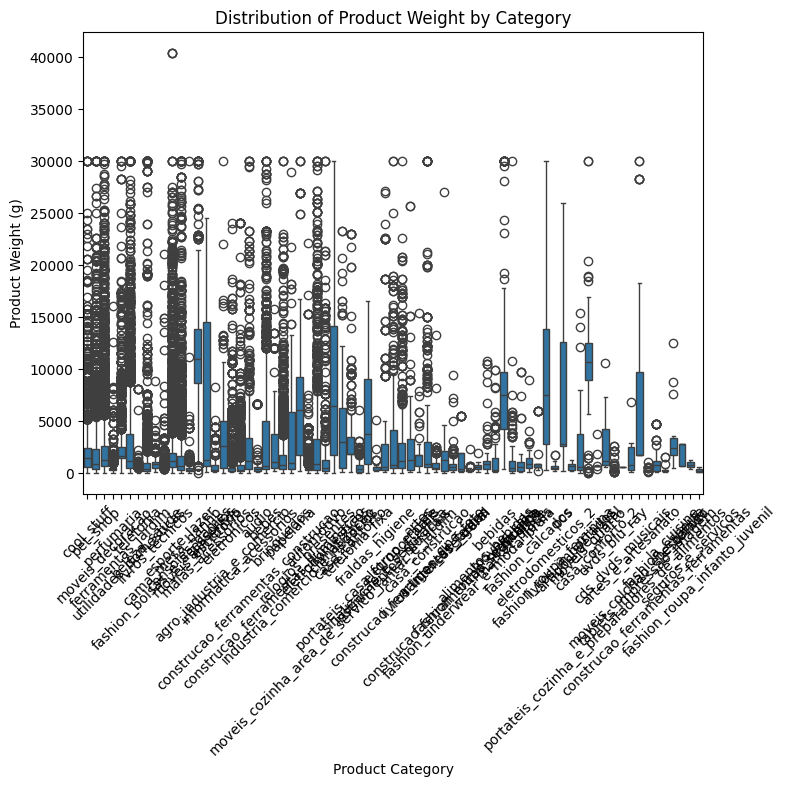

In [69]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=merged_data)
plt.title('Distribution of Product Weight by Category')
plt.xlabel('Product Category')
plt.ylabel('Product Weight (g)')
plt.xticks(rotation=45)
plt.show()


In [70]:
cust_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approval_time,approval_to_carrier_time,carrier_to_delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,0 days 00:16:37,6 days 19:25:45,1 days 23:47:38
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,0 days 00:10:08,2 days 20:16:27,13 days 19:26:20
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1 days 00:11:25,21 days 22:11:50,3 days 03:27:51
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,0 days 01:22:41,14 days 05:53:23,0 days 16:41:43
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,0 days 00:18:39,1 days 05:05:51,10 days 05:39:48


merges the 'customers' and 'orders' dataframes based on the 'customer_id' column, linking customers to their respective orders. The resulting dataframe, 'cust_orders', contains information about customers along with details of their orders, facilitating analysis of customer order history and behaviors.

In [71]:
cust_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   customer_id                    99441 non-null  object         
 1   customer_unique_id             99441 non-null  object         
 2   customer_zip_code_prefix       99441 non-null  int64          
 3   customer_city                  99441 non-null  object         
 4   customer_state                 99441 non-null  object         
 5   order_id                       99441 non-null  object         
 6   order_status                   99441 non-null  object         
 7   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 8   order_approved_at              99441 non-null  datetime64[ns] 
 9   order_delivered_carrier_date   99441 non-null  datetime64[ns] 
 10  order_delivered_customer_date  99441 non-null  datetime64[ns] 
 11  or

In [72]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   shipping_month              112650 non-null  int64         
 8   seller_zip_code_prefix      112650 non-null  int64         
 9   seller_city                 112650 non-null  object        
 10  seller_state                112650 non-null  object        
 11  product_category_name       112650 non-

In [73]:
cust_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)
cust_orders.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_to_approval_time,approval_to_carrier_time,carrier_to_delivery_time
17120,ab861bc4b2bc57d0f9043c2df76cfe38,a9b8982c5c9e68e1d4d45f6faad855a9,2318,sao paulo,SP,b38eef08b40fc62c878cc175dd26cd8d,delivered,2017-07-23 21:00:12,2017-07-25 03:50:28,2017-07-26 21:13:04,2017-08-10 20:51:59,2017-08-07,1 days 06:50:16,1 days 17:22:36,14 days 23:38:55
52714,8dd6dbd5b96c1763204a1b708ac94dc1,f476899105eb69dd2086f61990c3ec3c,91910,porto alegre,RS,4fd0ae446e2a80905f26ec0cf87f10e5,delivered,2018-03-24 20:18:27,2018-03-24 20:30:28,2018-03-27 14:57:56,2018-04-13 20:48:22,2018-04-19,0 days 00:12:01,2 days 18:27:28,17 days 05:50:26
9395,595515694ce1f925bffc652e5c6c348d,711066a7bba9951b1da0ce0f4302af23,8673,suzano,SP,10e722e25378399056392a2c2c5ff9ba,delivered,2018-02-07 09:58:30,2018-02-07 10:15:25,2018-02-08 17:12:25,2018-02-10 13:14:39,2018-02-23,0 days 00:16:55,1 days 06:57:00,1 days 20:02:14
89131,c1db10bb02654e19f7904e2699b69fb1,7430494e14aaf902d7d28c926b3420a2,85812,cascavel,PR,ceac7232b482d926498ad8945b2624fd,delivered,2017-10-18 23:22:47,2017-10-19 00:40:20,2017-10-24 21:33:53,2017-10-31 22:24:51,2017-11-28,0 days 01:17:33,5 days 20:53:33,7 days 00:50:58
68830,4356b8d02549aef5b23be49c9824ce56,8b802e7e072f89d661b088036bfdd9f8,6404,barueri,SP,6660a709a26684b66ea12d604ddf0579,delivered,2017-09-23 12:10:18,2017-09-23 12:30:16,2017-09-25 19:08:00,2017-09-27 19:25:34,2017-10-10,0 days 00:19:58,2 days 06:37:44,2 days 00:17:34


merges the 'payments' and 'reviews' dataframes based on the common 'order_id' column, linking payment information with corresponding reviews for orders. The resulting dataframe, 'payment_review', allows for analysis of payment details alongside any associated customer reviews, providing insights into customer satisfaction and payment experiences.

In [74]:
payment_review = pd.merge(
    left=payments,
    right=reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_creation_month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00,5.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,,,2018-06-30,2018-07-03 11:23:16,6.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,,Aprovada,2017-12-19,2017-12-22 17:55:30,12.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,,,2017-12-21,2017-12-21 21:42:31,12.0
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,,,2017-12-21,2017-12-22 01:10:39,12.0


### Merge all data
<br>
This will merge the two dataframes based on the 'order_id' column, combining the information from both dataframes into a single dataframe based on matching order IDs. Adjust the merge type ('how' parameter) according to your analysis requirements.








In [75]:
all_data = pd.merge(
    left=cust_orders,
    right=merged_data,
    how="inner",
    on="order_id"
)


all_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,itaquaquecetuba,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,itaquaquecetuba,SP,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,itaquaquecetuba,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,ibitinga,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,garca,SP,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
112646,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,araraquara,SP,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
112647,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,sao paulo,SP,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
112648,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,guariba,SP,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [76]:
final_data = pd.merge(
    left=payment_review,
    right=all_data,
    how="right",
    on="order_id"
)


final_data

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00e7ee1b050b8499577073aeb2a297a1,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,,,2017-05-26,...,itaquaquecetuba,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,29150127e6685892b6eab3eec79f59c7,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,,,2018-01-30,...,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,,,2018-06-15,...,itaquaquecetuba,SP,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,951670f92359f4fe4a63112aa7306eba,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,,,2018-03-29,...,itaquaquecetuba,SP,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,...,ibitinga,SP,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,6760e20addcf0121e9d58f2f1ff14298,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4.0,Recomendo,,2018-04-14,...,garca,SP,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
118306,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5.0,,,2018-04-12,...,araraquara,SP,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
118307,fed4434add09a6f332ea398efd656a5c,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1.0,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,...,sao paulo,SP,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
118308,e31ec91cea1ecf97797787471f98a8c2,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5.0,,,2017-11-17,...,guariba,SP,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       118310 non-null  object         
 1   payment_sequential             118307 non-null  float64        
 2   payment_type                   118307 non-null  object         
 3   payment_installments           118307 non-null  float64        
 4   payment_value                  118307 non-null  float64        
 5   review_id                      117329 non-null  object         
 6   review_score                   117329 non-null  float64        
 7   review_comment_title           117329 non-null  object         
 8   review_comment_message         117329 non-null  object         
 9   review_creation_date           117329 non-null  datetime64[ns] 
 10  review_answer_timestamp        117329 non-null  datetime

The final data that will be used !

## Data Visualization & Explanatory analysis

#### Question 1. :
1. Which month experiences the highest volume of transactional activity on the e-commerce platform?<br>

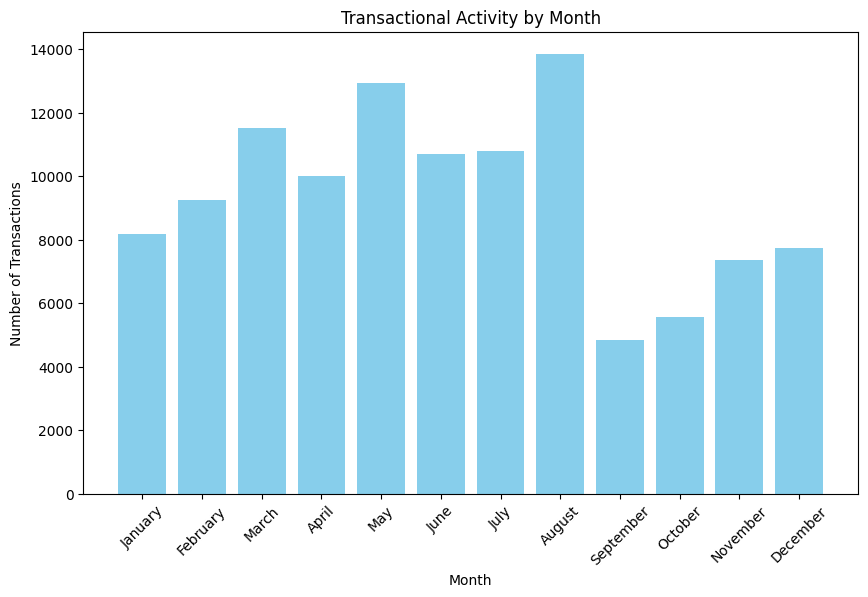

In [78]:
import matplotlib.pyplot as plt

months = month_counts.index
counts = month_counts.values

plt.figure(figsize=(10, 6))
plt.bar(months, counts, color='skyblue')
plt.title('Transactional Activity by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Based on this graph, it indicates that August had the highest transactional activity among the months.

#### Question 2
2. What are the best-selling products and least-selling products?<br>

<ipython-input-79-099a5f0dd65d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


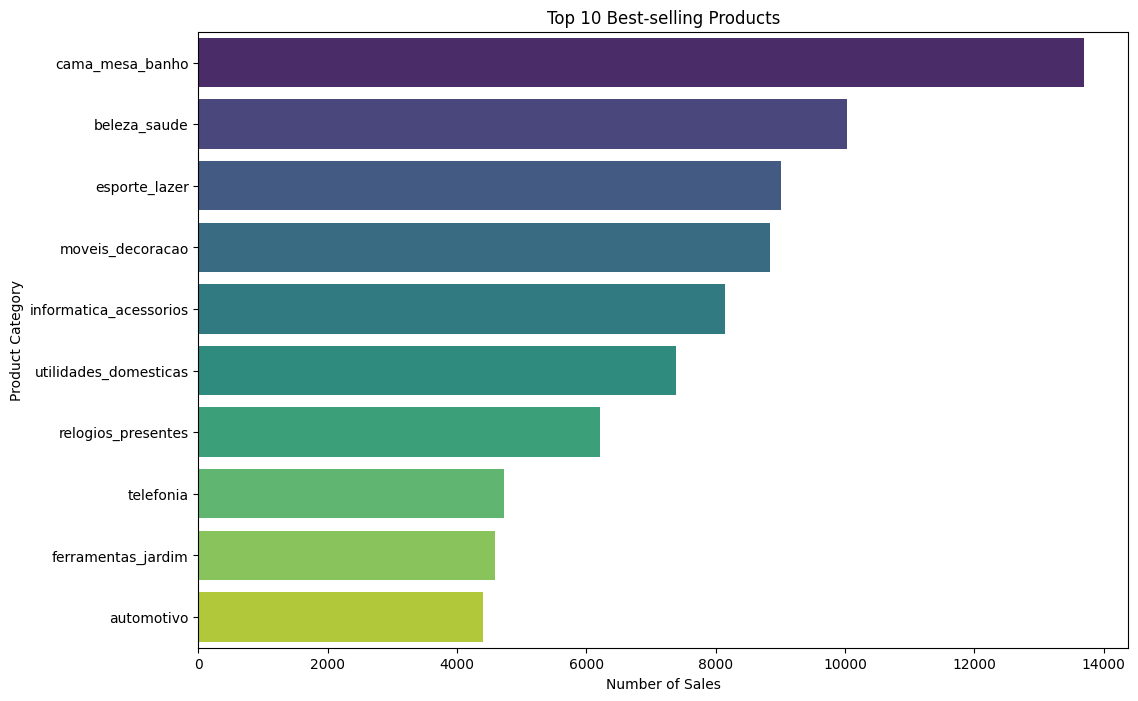

In [79]:
plt.figure(figsize=(12, 8))
top_products = final_data['product_category_name'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best-selling Products')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category')
plt.show()


This is the list of the top 10 best-selling products on the e-commerce platform. The first position is held by 'cama_mesa_banho', followed by 'beleza_saude' in the second position, and so on.

#### Question 3
How much budget do customers spend in recent months?

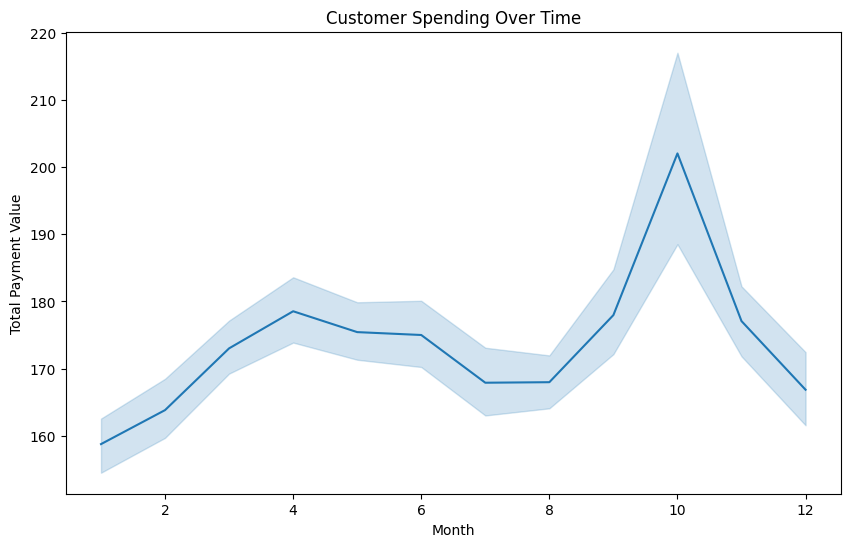

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='shipping_month', y='payment_value', data=final_data)
plt.title('Customer Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Payment Value')
plt.show()


Based on this graph, customer spending in October is the highest among other months.

#### Question 4
Where are the majority of customers located geographically?

In [81]:
import matplotlib.image as mpimg
import urllib
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

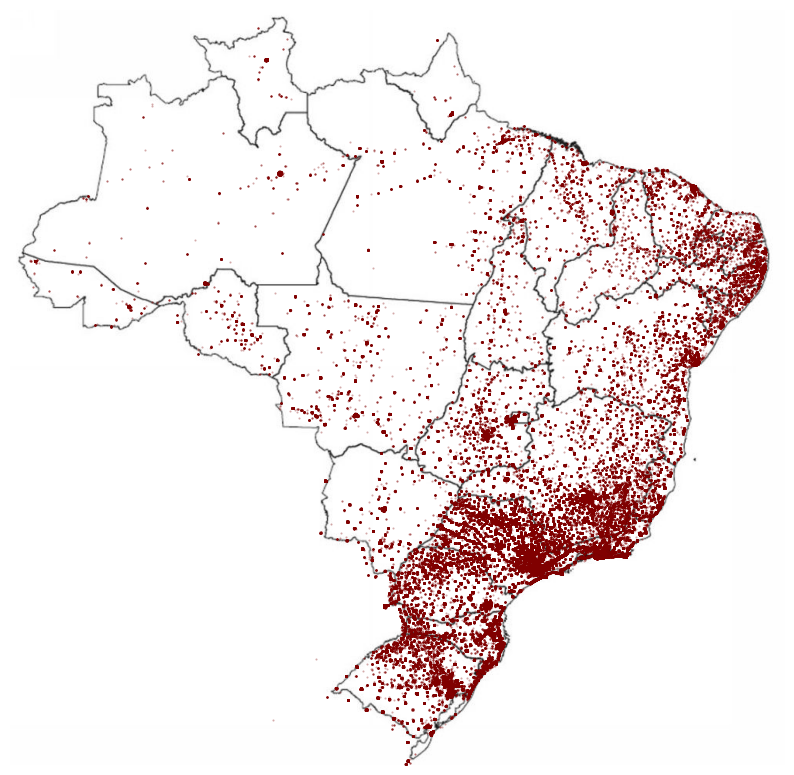

In [82]:

plot_brazil_map(geolocation)


in the southern region of Brazil, there is a significant concentration of transaction activities, indicating a bustling and dynamic commercial environment.

#### Question 5
What is the level of customer satisfaction with our services?

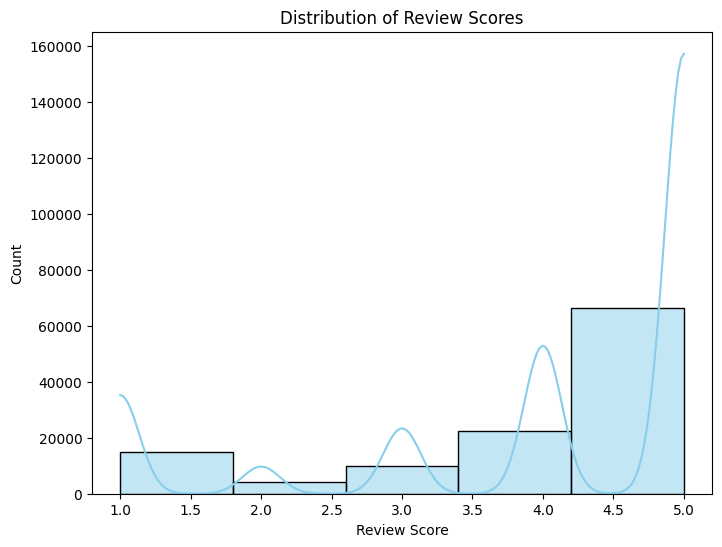

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(final_data['review_score'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()


Most clients give a score of 5 to the e-commerce platform, indicating high satisfaction with the service.

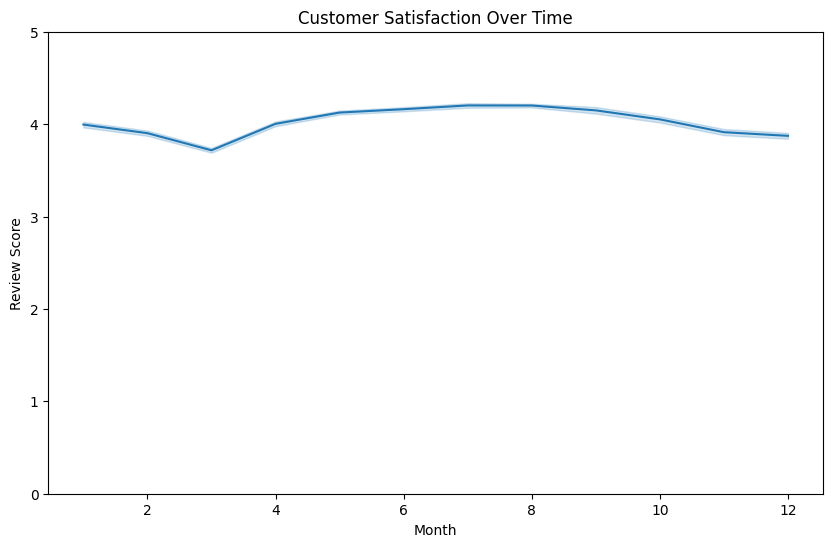

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='shipping_month', y='review_score', data=final_data)
plt.title('Customer Satisfaction Over Time')
plt.xlabel('Month')
plt.ylabel('Review Score')
plt.ylim(0, 5)
plt.show()


Customer satisfaction over time remains stable, although it slightly decreases in March; however, it remains consistently stable over time.

#### Question 6
6. Which payment method do customers prefer

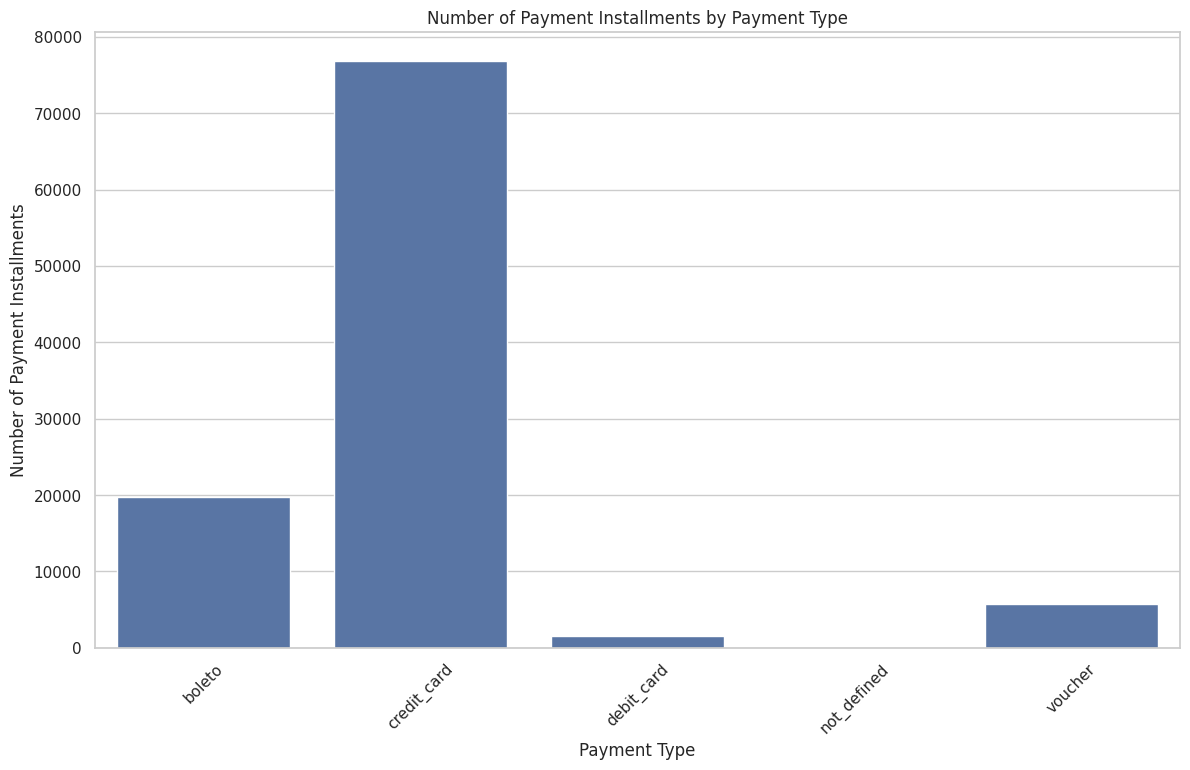

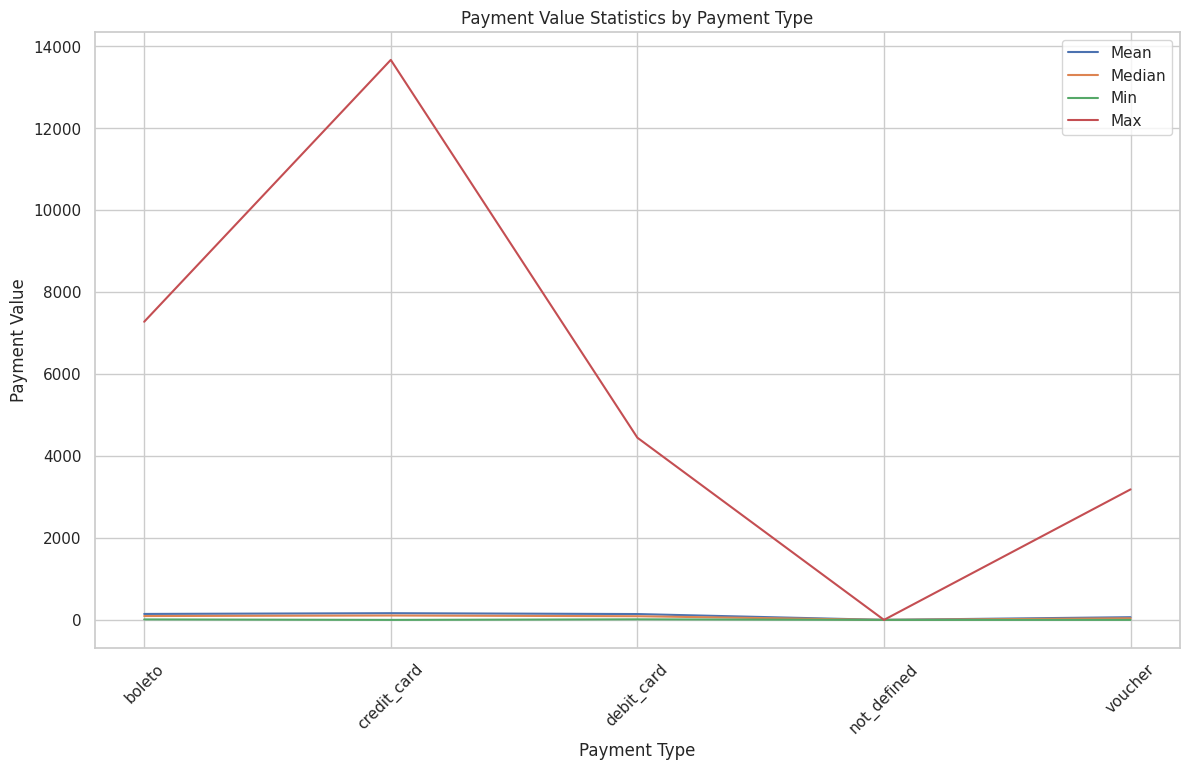

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x=payment_type_stats.index, y=('payment_installments', 'count'), data=payment_type_stats)
plt.title('Number of Payment Installments by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Payment Installments')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(x=payment_type_stats.index, y=('payment_value', 'mean'), data=payment_type_stats, label='Mean')
sns.lineplot(x=payment_type_stats.index, y=('payment_value', 'median'), data=payment_type_stats, label='Median')
sns.lineplot(x=payment_type_stats.index, y=('payment_value', 'min'), data=payment_type_stats, label='Min')
sns.lineplot(x=payment_type_stats.index, y=('payment_value', 'max'), data=payment_type_stats, label='Max')
plt.title('Payment Value Statistics by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Both payment value and the number of payment installments score highest with credit cards, especially when compared to other payment methods.

In [86]:
import pandas as pd

final_data['recency'] = (final_data['order_purchase_timestamp'].max() - final_data['order_purchase_timestamp']).dt.days

frequency_df = final_data.groupby('customer_id')['order_id'].nunique().reset_index()
frequency_df.columns = ['customer_id', 'frequency']
monetary_df = final_data.groupby('customer_id')['price'].sum().reset_index()
monetary_df.columns = ['customer_id', 'monetary']
rfm_df = pd.merge(frequency_df, monetary_df, on='customer_id')
rfm_df = pd.merge(rfm_df, final_data[['customer_id', 'recency']].drop_duplicates(), on='customer_id')
rfm_df


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,292
1,000161a058600d5901f007fab4c27140,1,54.90,413
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,551
3,0002414f95344307404f0ace7a26f1d5,1,149.90,382
4,000379cdec625522490c315e70c7a9fb,1,93.00,153
...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,1,78.00,170
98662,fffecc9f79fd8c764f843e9951b11341,1,164.70,157
98663,fffeda5b6d849fbd39689bb92087f431,1,47.90,103
98664,ffff42319e9b2d713724ae527742af25,1,199.90,81


The provided code calculates the RFM (Recency, Frequency, Monetary) metrics for each customer in the final_data DataFrame by computing their recency, frequency (number of orders), and monetary value (total spending). It then merges these metrics into a single DataFrame named rfm_df, which contains the calculated RFM values for each customer.
The provided result shows the RFM metrics (frequency, monetary, and recency) for individual customers. Insights can be derived as follows:
1. Frequency indicates the number of orders per customer, helping identify loyal or frequent buyers.
2. Monetary value represents the total amount spent by each customer, highlighting high-value customers.
3. Recency denotes the number of days since the last purchase, offering insights into customer engagement and potential churn risk.

In [87]:
payment_value_quartiles = final_data['payment_value'].quantile([0.25, 0.5, 0.75])
price_quartiles = final_data['price'].quantile([0.25, 0.5, 0.75])
freight_value_quartiles = final_data['freight_value'].quantile([0.25, 0.5, 0.75])

def assign_cluster(row):
    if row['payment_value'] <= payment_value_quartiles[0.25]:
        return 'Low Payment'
    elif row['payment_value'] <= payment_value_quartiles[0.5]:
        return 'Medium Payment'
    else:
        return 'High Payment'

final_data['payment_cluster'] = final_data.apply(assign_cluster, axis=1)

print(final_data['payment_cluster'].value_counts())

High Payment      59128
Medium Payment    29593
Low Payment       29589
Name: payment_cluster, dtype: int64


The payment values are divided into three clusters based on quartiles: "Low Payment", "Medium Payment", and "High Payment". The majority of transactions fall into the "High Payment" cluster, followed by nearly equal counts in the "Medium Payment" and "Low Payment" clusters.

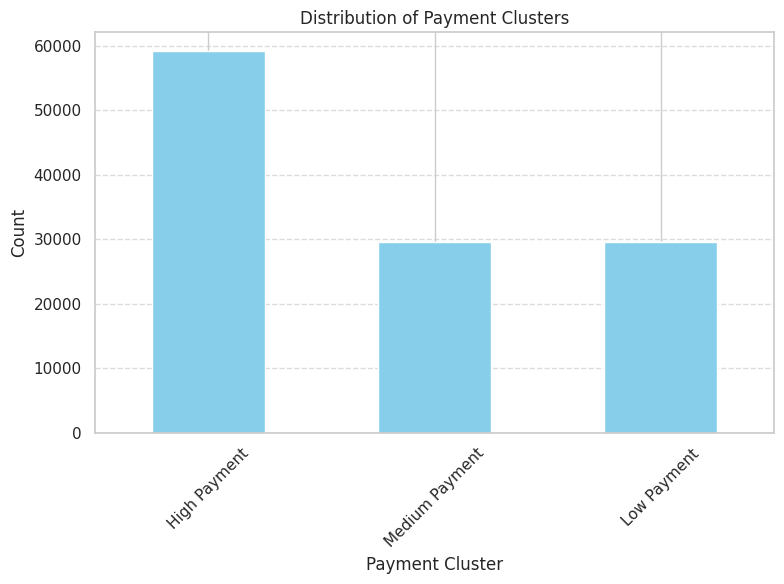

In [88]:
cluster_counts = final_data['payment_cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Clusters')
plt.xlabel('Payment Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Export Final data to CSV

In [89]:
final_data.to_csv("all_data.csv", index=False)

## Conclusion

After analyzing the data, I have reached the following conclusions for the provided questions:

- The month of August experiences the highest volume of transactional activity on the e-commerce platform.
- The best-selling product categories include "cama_mesa_banho" and "beleza_saude," while the least-selling categories are "fashion_roupa_infanto_juvenil."
- Customers tend to spend the most on their purchases in recent months.
- The majority of customers are located in southern Brazil, where the highest number of transactions occur.
- Customer satisfaction with our services remains stable over time, with a slight decrease noted in March.
- The preferred payment method among customers is credit card, as it offers the highest payment value and number of payment installments compared to other methods.